In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1



In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1   
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : ushuaia
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 : thompson
Processing Record 4 of Set 1 : takoradi
Processing Record 5 of Set 1 : jamestown
Processing Record 6 of Set 1 : clyde river
City not found. Skipping...
Processing Record 7 of Set 1 : salcedo
Processing Record 8 of Set 1 : saskylakh
Processing Record 9 of Set 1 : wajir
Processing Record 10 of Set 1 : axim
Processing Record 11 of Set 1 : arraial do cabo
Processing Record 12 of Set 1 : saint anthony
Processing Record 13 of Set 1 : atuona
Processing Record 14 of Set 1 : touros
Processing Record 15 of Set 1 : sinnamary
Processing Record 16 of Set 1 : lake havasu city
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : severo-kurilsk
Processing Record 19 of Set 1 : rikitea
Processing Record 20 of Set 1 : port alfred
Processing Record 21 of Set

Processing Record 35 of Set 4 : mananjary
Processing Record 36 of Set 4 : ilebo
Processing Record 37 of Set 4 : darnah
City not found. Skipping...
Processing Record 38 of Set 4 : qiqihar
Processing Record 39 of Set 4 : torbay
Processing Record 40 of Set 4 : beyneu
Processing Record 41 of Set 4 : batemans bay
City not found. Skipping...
Processing Record 42 of Set 4 : ipixuna
Processing Record 43 of Set 4 : bowen
Processing Record 44 of Set 4 : khani
Processing Record 45 of Set 4 : tasiilaq
Processing Record 46 of Set 4 : saldanha
Processing Record 47 of Set 4 : taoudenni
Processing Record 48 of Set 4 : itaituba
Processing Record 49 of Set 4 : cape town
Processing Record 50 of Set 4 : quatis
Processing Record 0 of Set 5 : codajas
Processing Record 1 of Set 5 : san buenaventura
Processing Record 2 of Set 5 : ahipara
Processing Record 3 of Set 5 : san patricio
Processing Record 4 of Set 5 : masvingo
Processing Record 5 of Set 5 : krasnovishersk
Processing Record 6 of Set 5 : jalu
Processi

Processing Record 21 of Set 8 : samarai
Processing Record 22 of Set 8 : ballinasloe
Processing Record 23 of Set 8 : neiafu
Processing Record 24 of Set 8 : el alto
Processing Record 25 of Set 8 : belyy yar
Processing Record 26 of Set 8 : homer
Processing Record 27 of Set 8 : bani
Processing Record 28 of Set 8 : kulhudhuffushi
Processing Record 29 of Set 8 : wukari
Processing Record 30 of Set 8 : pokhara
Processing Record 31 of Set 8 : la rioja
Processing Record 32 of Set 8 : flinders
Processing Record 33 of Set 8 : vertientes
Processing Record 34 of Set 8 : kargasok
Processing Record 35 of Set 8 : estrela
Processing Record 36 of Set 8 : westport
Processing Record 37 of Set 8 : solnechnyy
Processing Record 38 of Set 8 : amos
Processing Record 39 of Set 8 : kuminskiy
Processing Record 40 of Set 8 : inta
Processing Record 41 of Set 8 : ust-kuyga
City not found. Skipping...
Processing Record 42 of Set 8 : halkirk
Processing Record 43 of Set 8 : golden
Processing Record 44 of Set 8 : novoili

In [5]:
weather = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})
weather.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [6]:
weather.to_csv("output_data/cities.csv", index=False)

In [7]:
bad_weather = weather[(weather["Humidity"] > 100)].index
bad_weather

Int64Index([], dtype='int64')

In [8]:
good_weather = weather.drop(bad_weather, inplace=False)
good_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,20,CL,1630304372,86,-53.1500,-70.9167,32.11,6.91
1,Ushuaia,20,AR,1630304384,75,-54.8000,-68.3000,35.26,12.66
2,Thompson,1,CA,1630304133,81,55.7435,-97.8558,48.36,0.00
3,Takoradze,100,GH,1630304385,89,4.8845,-1.7554,75.87,9.66
4,Jamestown,90,US,1630304384,98,42.0970,-79.2353,70.18,4.00


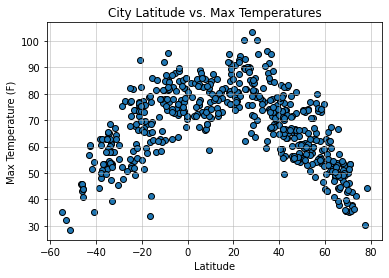

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(good_weather["Lat"], good_weather["Max Temp"], edgecolor = "black")

plt.title("City Latitude vs. Max Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("images/City Latitude vs Max Temperature.png")

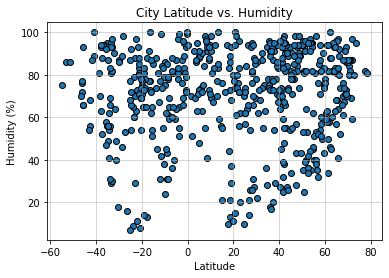

In [15]:
plt.scatter(good_weather["Lat"], good_weather["Humidity"], edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("images/City Latitude vs Humidity.png")

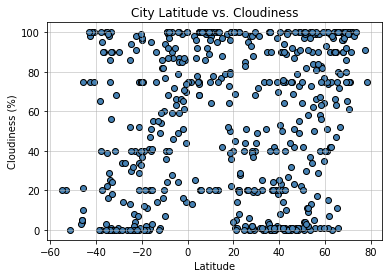

In [17]:
plt.scatter(good_weather["Lat"], good_weather["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("images/City Latitude vs Cloudiness.png")

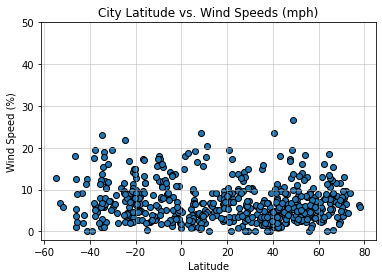

In [18]:
plt.scatter(good_weather["Lat"], good_weather["Wind Speed"], edgecolor = "black")
plt.title("City Latitude vs. Wind Speeds (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("images/City Latitude vs Wind Speed (mph).png")